# A Very Simple Cartoonify of An Image

In [1]:
from IPython.display import ProgressBar
from ipywidgets import interact, interact_manual, Text
import sys, os
from io import BytesIO
import urllib
import numpy as np
from matplotlib import pyplot as mp
import PIL.Image, PIL.ImageFilter
print('sys.platform:',sys.platform)

sys.platform: linux


In [2]:
MONALISA = 'https://upload.wikimedia.org/wikipedia/commons/thumb/' \
    'e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/' \
    '402px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg'

In [3]:
class Cartoonify(object):

    def __init__(self,img):
        self.img = img # PIL.Image
        
    def __call__(self,boxblur,colors):
        img = self.img.filter(PIL.ImageFilter.BoxBlur(boxblur))
        img = img.convert(mode="P",palette=PIL.Image.ADAPTIVE,colors=colors)
        img = img.convert(mode="RGB")
        return self.__class__(img)

    def imshow(self):
        ax = mp.gca()
        ax.imshow(self.img)
        ax.set_xticklabels([])
        ax.set_yticklabels([])      

    def show(self,boxblur,colors):
        fig = mp.figure(figsize=(10,8))
        ax = mp.subplot(1,2,1)
        self.imshow()
        ax.set_title('original')
        ax = mp.subplot(1,2,2)
        self.__call__(boxblur,colors).imshow()
        ax.set_title('transform')
        mp.tight_layout()
        mp.show()
        
    @classmethod
    def from_url(cls,url):
        with urllib.request.urlopen(url) as response:
            data = response.read()
        img = PIL.Image.open(BytesIO(data))
        return cls(img)

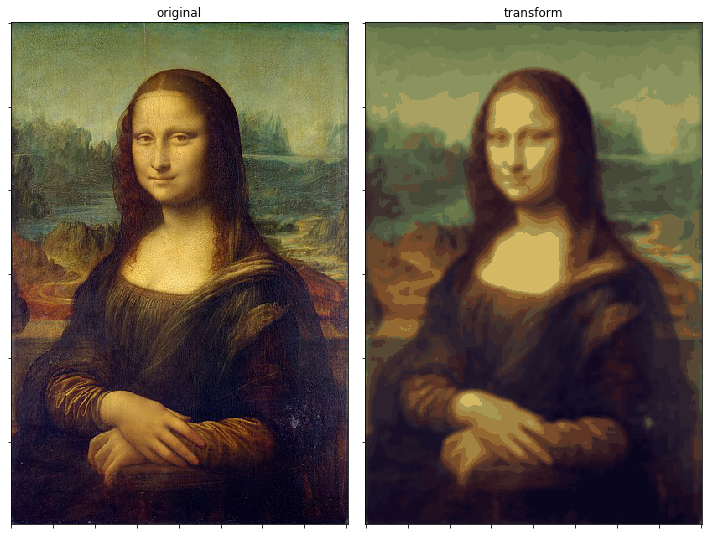

In [4]:
Cartoonify.from_url(MONALISA).show(boxblur=3,colors=32)

In [5]:
def demo():
    def run(url):
        if url == "" or not url.startswith('http'):
            return
        toonify = Cartoonify.from_url(url)
        interact_manual(toonify.show,boxblur=(3,7),colors=(8,32,8))
    interact(run,url=Text(layout={'width':'86%'}))

interact_manual.opts['manual_name'] = 'toonify'
demo()

interactive(children=(Text(value='', description='url', layout=Layout(width='86%')), Output()), _dom_classes=(…